In [1]:
import datetime
import time as time_module
import sys
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import theano
import matplotlib
import pymc3 as pm

try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    sys.path.append('../..')
    import covid19_inference as cov19

path_to_save = '../../figures/'


In [2]:

confirmed_cases = cov19.get_jhu_confirmed_cases()

country = 'Germany'
date_data_begin = datetime.datetime(2020,3,1)
date_data_end   = cov19.get_last_date(confirmed_cases)

#date_data_end   = datetime.datetime(2020,3,28)
num_days_data = (date_data_end-date_data_begin).days
diff_data_sim = 16 # should be significantly larger than the expected delay, in 
                   # order to always fit the same number of data points.
num_days_future = 28
date_begin_sim = date_data_begin - datetime.timedelta(days = diff_data_sim)
date_end_sim   = date_data_end   + datetime.timedelta(days = num_days_future)
num_days_sim = (date_end_sim-date_begin_sim).days


cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

print('Cases yesterday ({}): {} and '
      'day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))

prior_date_mild_dist_begin =  datetime.datetime(2020,3,9)
prior_date_strong_dist_begin =  datetime.datetime(2020,3,16)
prior_date_contact_ban_begin =  datetime.datetime(2020,3,23)

change_points = [dict(pr_mean_date_begin_transient = prior_date_mild_dist_begin,
                      pr_sigma_date_begin_transient = 3,
                      pr_median_lambda = 0.2,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_strong_dist_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_contact_ban_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8/2,
                      pr_sigma_lambda = 0.5)]

traces = []
models = []
for num_change_points in range(4):
    model = cov19.SIR_with_change_points(new_cases_obs = np.diff(cases_obs),
                                        change_points_list = change_points[:num_change_points],
                                        date_begin_simulation = date_begin_sim,
                                        num_days_sim = num_days_sim,
                                        diff_data_sim = diff_data_sim,
                                        N = 83e6,
                                        priors_dict=None)
    models.append(model)

    traces.append(pm.sample(model=model, init='advi', draws=4000))

Cases yesterday (2020-04-12T00:00:00): 127854 and day before yesterday: 124908
pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 413.79:   6%|▋         | 12746/200000 [00:19<04:43, 660.00it/s]
Convergence achieved at 12800
Interrupted at 12,799 [6%]: Average Loss = 557.66
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, lambda_0, I_begin]
Sampling 4 chains, 21 divergences: 100%|██████████| 18000/18000 [03:45<00:00, 79.93draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 0 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Sampling 4 chains, 0 divergences: 100%|██████████| 18000/18000 [11:42<00:00, 25.63draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 1 was set to default value 3
pr_sigma_transient_len of change point 1 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 401.25:   7%|▋         | 14655/200000 [00:22<04:48, 642.59it/s]
Convergence achieved at 14700
Interrupted at 14,699 [7%]: Average Loss = 513.72
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_1, transient_len_0, transient_begin_1, transient_begin_0, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences:  50%|████▉     | 8983/18000 [06:00<05:29, 27.34draws/s]

NameError: name 'conv_time_to_mpl_dates' is not defined

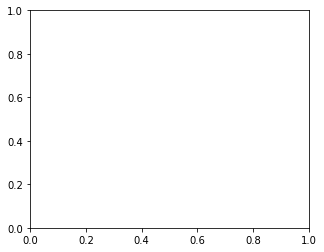

In [3]:
fig, ax = plt.subplots(figsize=(5,4))
time = np.arange(-len(cases_obs)+1, 0)
mpl_dates = conv_time_to_mpl_dates(time) 
ax.plot(mpl_dates, np.abs(np.median(trace.new_cases[:, :num_days_data], axis=0) - np.diff(cases_obs)), 
        'd', markersize=6,
         label='Absolute difference\n'
               'between fit and data')
ax.plot(mpl_dates, np.sqrt(np.median(trace.new_cases[:, :num_days_data], axis=0))*np.median(trace.sigma_obs, axis=0),
         label='Width of the likelihood', lw=3)
ax.set_ylabel('Difference (number of new cases)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')
print(np.median(np.sum(trace.new_cases[:, :num_days_data], axis=1)+ trace.I_begin))
#plt.tight_layout()
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%-m/%-d'))


In [4]:
exec(open('figures.py').read())

[<Figure size 576x144 with 4 Axes>, <Figure size 468x540 with 3 Axes>]

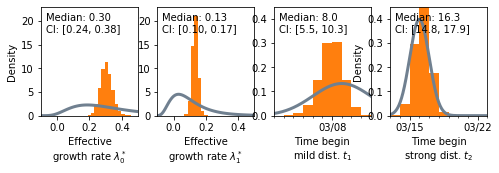

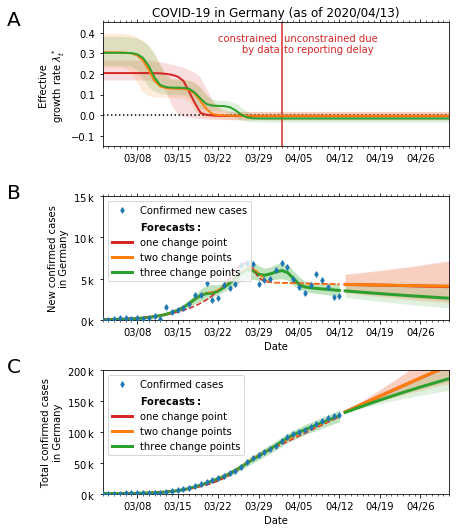

In [5]:
create_figure_0(save_to = path_to_save)

[<Figure size 288x432 with 5 Axes>,
 <Figure size 288x432 with 5 Axes>,
 <Figure size 288x432 with 5 Axes>]

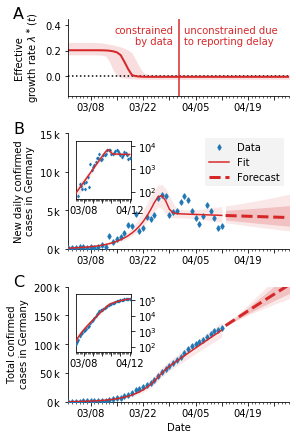

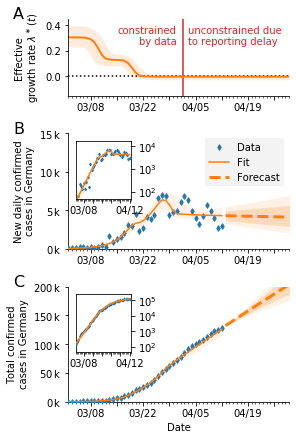

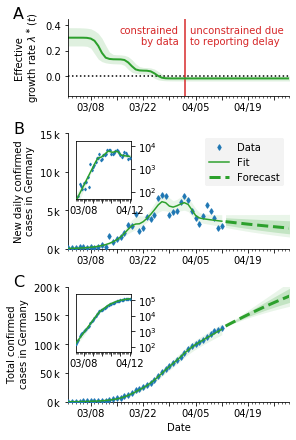

In [6]:
create_figure_3_timeseries(save_to=path_to_save)

/scratch.local/jdehning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1535: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.WeekdayLocator'>
/scratch.local/jdehning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1535: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.WeekdayLocator'>
/scratch.local/jdehning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1535: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.WeekdayLocator'>


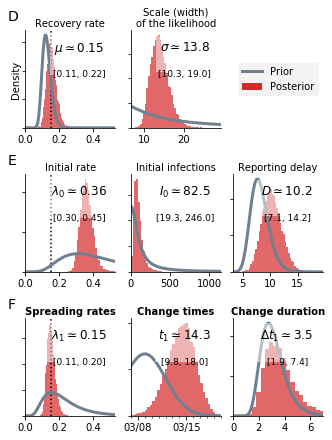

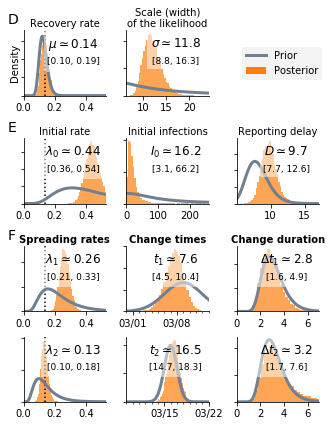

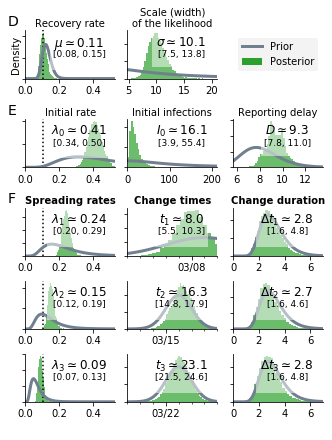

In [7]:
create_figure_3_distributions(models[1], traces[1], layout=2,
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:red',
                              num_changepoints=1, xlim_tbegin=7, save_to = path_to_save +'Fig_S2')
create_figure_3_distributions(models[2], traces[2], layout=2,
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:orange',
                              num_changepoints=2, xlim_tbegin=7, save_to = path_to_save +'Fig_4')
create_figure_3_distributions(models[3], traces[3], layout=2,
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:green',
                              num_changepoints=3, save_to = path_to_save + 'Fig_S4')

In [8]:
print('\n0 step model\n')
print(pm.loo(traces[0], model))

print('\n1 step model\n')
print(pm.loo(traces[1], model))

print('\n2 steps model\n')
print(pm.loo(traces[2], model))

print('\n3 steps model\n')
print(pm.loo(traces[3], model))


0 step model

Computed from 16000 by 42 log-likelihood matrix

       Estimate       SE
IC_loo   746.99    11.86
p_loo      4.13        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       42  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


1 step model

Computed from 16000 by 42 log-likelihood matrix

       Estimate       SE
IC_loo   679.83    15.67
p_loo      7.39        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       38   90.5%
 (0.5, 0.7]   (ok)          4    9.5%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


2 steps model

Computed from 16000 by 42 log-likelihood matrix

       Estimate       SE
IC_loo   666.94    17.13
p_loo      9.70        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       42  100.0%
 (0.5, 0.7]   (o

In [9]:
for i in range(4):
    print('λ_{}*: '.format(i))
    print(print_median_CI(trace['lambda_{}'.format(i)] - trace.mu, prec=3))
    print('\n')

λ_0*: 


NameError: name 'trace' is not defined